In [1]:

import json
import os
import matplotlib.pyplot as plt
import pytz
import numpy as np
import json
import numpy as np
import statsmodels.api as sm
import datetime, time
import pytz
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
def plot_histogram(posting_time, hashtag):
    hours = int((max(posting_time)-min(posting_time))/3600)
    start_time = min(posting_time)
    for i in range(len(posting_time)):
        posting_time[i] = (posting_time[i]-start_time)/3600
    plt.hist(posting_time, bins = hours)
    plt.xlabel('time(hour)')
    plt.ylabel('number of tweets')
    plt.title('number of tweets in hour over time for hashtag '+hashtag)
    plt.show()   

['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
For hashtag #gohawks:
Average number of tweets per hour is 292.48785062173687
Average number of followers of users posting the tweets per hour is 2217.9237355281984
Average number of retweets per hour is 2.0132093991319877
--------------------
For hashtag #gopatriots:
Average number of tweets per hour is 40.95469800606194
Average number of followers of users posting the tweets per hour is 1427.2526051635405
Average number of retweets per hour is 1.4081919101697078
--------------------
For hashtag #nfl:
Average number of tweets per hour is 397.0213901819841
Average number of followers of users posting the tweets per hour is 4662.37544523693
Average number of retweets per hour is 1.5344602655543254
--------------------


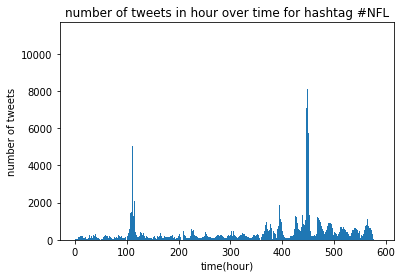

For hashtag #patriots:
Average number of tweets per hour is 750.89426460689
Average number of followers of users posting the tweets per hour is 3280.4635616550277
Average number of retweets per hour is 1.7852871288476946
--------------------
For hashtag #sb49:
Average number of tweets per hour is 1276.8570598680474
Average number of followers of users posting the tweets per hour is 10374.160292019487
Average number of retweets per hour is 2.52713444111402
--------------------
For hashtag #superbowl:
Average number of tweets per hour is 2072.11840170408
Average number of followers of users posting the tweets per hour is 8814.96799424623
Average number of retweets per hour is 2.3911895819207736
--------------------


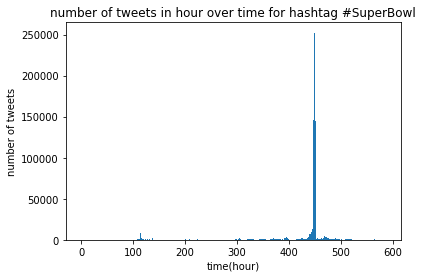

In [6]:
#Question 1

folder_path = r"C:\Users\vaish\OneDrive\Desktop\UCLA\lsdm\project5\data"
files= os.listdir(folder_path) # all the file name in the folder
all_tweets = {}
print(files)
posting_time_all = {}
for file in files:
     if not os.path.isdir(file): # open file if it is not a folder
        f = open(folder_path + "/" + file, encoding="utf-8") # open a file
        posting_time = []
        followers = 0
        retweets = 0    
        for line in f:
            data = json.loads(line)
            posting_time.append(data['citation_date'])
            followers += data['author']['followers']
            retweets += data['metrics']['citations']['total']
        f.close()
        num_of_tweets = len(posting_time)
        avg_followers = followers/num_of_tweets
        avg_retweets = retweets/num_of_tweets
        hours = (max(posting_time)-min(posting_time))/3600
        avg_tweets = num_of_tweets/hours
        posting_time_all[str(file[7:-4])] = posting_time
        print ('For hashtag '+file[7:-4]+':')
        print ('Average number of tweets per hour is '+str(avg_tweets))
        print ('Average number of followers of users posting the tweets per hour is '+str(avg_followers))
        print ('Average number of retweets per hour is '+str(avg_retweets))
        print ('-'*20)
        if file == 'tweets_#nfl.txt':
            plot_histogram(posting_time , '#NFL')
        if file == 'tweets_#superbowl.txt':
            plot_histogram(posting_time , '#SuperBowl')

In [3]:
# extracting features
pst_tz = pytz.timezone('America/Los_Angeles')
def extracting(hashtag):
    file = open('./data/'+hashtag, encoding = 'utf8')
    posting_time = []
    num_retweets = []
    num_followers = []
    for line in file:
        data = json.loads(line)
        posting_time.append(data['citation_date'])
        num_retweets.append(data['metrics']['citations']['total'])
        num_followers.append(data['author']['followers'])
    file.close()
    hours = int((max(posting_time)-min(posting_time))/3600)+1
    tmp = np.zeros([hours, 5])
    start_time = min(posting_time)
    start_hour = (datetime.datetime.fromtimestamp(start_time, pst_tz)).hour

    for i in range(hours):
        tmp[i,4] = (start_hour+i)%24
    for i in range(len(posting_time)):
        tmp[int((posting_time[i]-start_time)/3600), 0] += 1
        tmp[int((posting_time[i]-start_time)/3600), 1] += num_retweets[i]
        tmp[int((posting_time[i]-start_time)/3600), 2] += num_followers[i]
        if tmp[int((posting_time[i]-start_time)/3600), 3] < num_followers[i]:
            tmp[int((posting_time[i]-start_time)/3600), 3] = num_followers[i]
    return tmp

In [4]:
def find_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [5]:
def plot_feature(fea_val, pred, hashtag, feature_name):
    plt.scatter(pred,fea_val, color = 'blue')
    plt.xlabel(feature_name)
    plt.ylabel('predictant')
    plt.title('# tweet for next hour vs. ' + feature_name + ' (tweets_' + hashtag + ')')
    plt.grid(True)
    plt.show();


In [9]:
def feature_analysis(all):
    #we use the features of each preceding data point to predict the label of the next data point 
    #label here is feature no 0 i.e the number of tweets. 
    
    #print("all.shape",all.shape)
    #dropping the features of the last data point
    data = all[:-1, :]
    #dropping the label of the first data point 
    target = all[1:, 0]
    
    #print("data.shape",data.shape)
    #print("target.shape",target.shape)
    #sm.OLS 
    model = sm.OLS(target, data)
    results = model.fit()
    print (results.summary())
    
def fitting(all,hashtag,features,print_top3=False):
    #np.random.seed(1)
    #np.random.shuffle(all)
    data = all[:-1, :]
    target = all[1:, 0]
    
    model = sm.OLS(target, data)
    results = model.fit()
    print (results.summary())
    print("p values = ",results.pvalues)
    print("t values = ",results.tvalues)
    print("coeefecients = ", results.params)
    
    print(np.argsort(results.pvalues))
    print("features in ascending order of p-values",features[np.argsort(results.pvalues)])
    print("features in descending order of t-values",features[np.argsort(results.tvalues)[::-1]])
    print("features in descending order of coeefecients (absolute value)",features[np.argsort(np.absolute(results.params))[::-1]])


    pred = results.fittedvalues
    if(print_top3==True):
            p_val = results.pvalues
            print ('P-values for each feature of tweets_' + str(hashtag) + ' are: ')
            print (p_val)
            index = np.argsort(np.array(p_val))[0:3]
            #sorted(range(len(p_val)), key = lambda i: p_val[i])[0:3]
            print('top 3 features are:')
            print(features[index[0]], features[index[1]], features[index[2]])
            print(data.shape)
            plot_feature(data[:,index[0]], pred, hashtag, features[index[0]])
            plot_feature(data[:,index[1]], pred, hashtag, features[index[1]])
            plot_feature(data[:,index[2]], pred, hashtag, features[index[2]])
            print ('='*50)
            

    #mae =np.mean(np.abs(pred-all[1:, 0]))
    mae = mean_absolute_error(all[1:, 0],pred)
    rmse =find_rmse(pred,all[1:,0]) 
    mse = mean_squared_error(all[1:,0],pred)
    #print("mse2=",np.sqrt(np.mean((all[1:,0] - pred) ** 2)))
    #print(np.sqrt(mse))
    #print("r2=",r2_score(all[1:,0],pred))
    return rmse,mae,mse

In [184]:
hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
for hashtag in hashtags:
    all = extracting(hashtag)
    print ('For hashtag '+hashtag[7:-4]+':')
    #feature_analysis(all)
    features = np.array(['tweets_num', 'retweets_num', 'sum_followers', 'max_followers','time_of_day'])
    rmse,mae,mse = fitting(all,hashtag,features)    
    print ('The training error(MSE) is '+str(mse))
    print ('The training error(MAE) is '+str(mae))
    print ('The training error(RMSE) is '+str(rmse))
    print ('-'*20)

For hashtag #gohawks:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           5.72e-91
Time:                        22:55:59   Log-Likelihood:                -4716.9
No. Observations:                 578   AIC:                             9444.
Df Residuals:                     573   BIC:                             9466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5364      0.1

For hashtag #patriots:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     290.9
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          1.55e-155
Time:                        22:57:04   Log-Likelihood:                -5325.4
No. Observations:                 586   AIC:                         1.066e+04
Df Residuals:                     581   BIC:                         1.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2195      0.

In [7]:
def extract_features(hashtag): 
    posting_time = []
    file = open('./data/'+hashtag, encoding = 'utf8')
    
    
    for line in file:
        data = json.loads(line)
        posting_time.append(data['citation_date'])
    
  
    total_hours = int((max(posting_time)-min(posting_time))/3600)+1
    #total_hours = (end_time - start_time) / 3600 + 1
    start_time = min(posting_time)
    end_time= max(posting_time)
    
    # extract five basic features
    feat_5 = extracting(hashtag)
    
    ori_author_followers = [0 for i in range(total_hours)] # total number of followers of the original author
    favorited_num = [0 for i in range(total_hours)] # total number of times of favorited, so many zeros
    impressions_num = [0 for i in range(total_hours)]
    avg_ranking_score = [0 for i in range(total_hours)]
    user_mentions = [0 for i in range(total_hours)]
    url_count = [0 for i in range(total_hours)]
    unique_author_set = [set() for i in range(total_hours)] # save unique author 
    
    file = open('./data/'+hashtag, encoding = 'utf8')
    # extract other features
    for line in file:
        tweet = json.loads(line)
        tweet_time = tweet['citation_date']
        hour = int((tweet_time - start_time) / 3600)
        ori_author_followers[hour] += tweet['original_author']['followers']
        favorited_num[hour] += tweet['tweet']['favorite_count']
    
        user_mentions[hour] += len(tweet['tweet']['entities']['user_mentions'])
        url_count[hour] += len(tweet['tweet']['entities']['urls'])
        unique_author_set[hour].add(tweet['author']['nick'])
        impressions_num[hour] += tweet['metrics']['impressions']
        avg_ranking_score[hour] += tweet['metrics']['ranking_score'] # need to do average later
        
    file.close()        
    total_tweets = feat_5[0]
    for i in range(0, len(total_tweets)):
        if(total_tweets[i] != 0):
            avg_ranking_score[i] = avg_ranking_score[i] / total_tweets[i]
    
    unique_author_count =  [len(val) for val in unique_author_set]  # number of unique authors
    feat_extra =np.array([ori_author_followers, favorited_num, \
                  user_mentions, url_count, unique_author_count,\
                  impressions_num,avg_ranking_score]).T

    
    print(feat_extra.shape)
    feat_all = np.hstack((feat_5 , feat_extra))
    print(feat_all[0,:])
    return feat_all



(579, 7)
[3.00000000e+01 4.60000000e+02 2.40060000e+04 1.29220000e+04
 0.00000000e+00 3.61286000e+06 0.00000000e+00 2.60000000e+01
 1.10000000e+01 2.50000000e+01 2.24680000e+04 3.99785646e+00]
For hashtag #gohawks:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     124.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          3.10e-150
Time:                        17:06:23   Log-Likelihood:                -4559.9
No. Observations:                 578   AIC:                             9144.
Df Residuals:                     566   BIC:                             9196.
Df Model:                          12                                         
Covariance Type:            nonrobust                                     

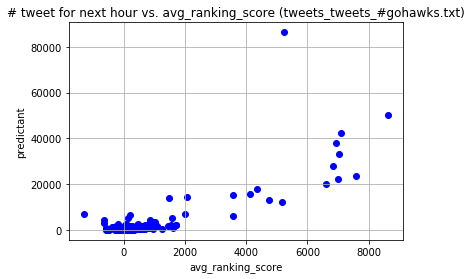

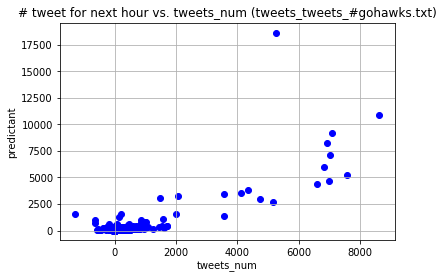

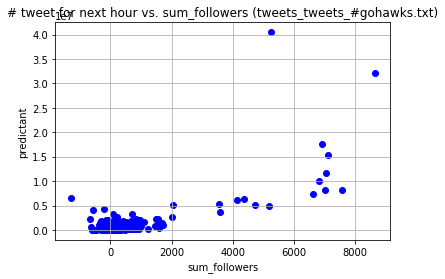

The training error(MSE) is 416854.1077280191
The training error(MAE) is 230.15138302656064
The training error(RMSE) is 645.6423992644993
--------------------
(575, 7)
[2.00000000e+00 7.00000000e+00 1.27170000e+04 1.09550000e+04
 1.00000000e+00 1.27170000e+04 0.00000000e+00 2.00000000e+00
 0.00000000e+00 2.00000000e+00 1.25200000e+04 5.86951625e+00]
For hashtag #gopatriots:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     370.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          1.08e-257
Time:                        17:06:30   Log-Likelihood:                -3418.2
No. Observations:                 574   AIC:                             6860.
Df Residuals:                     562   BIC:                           

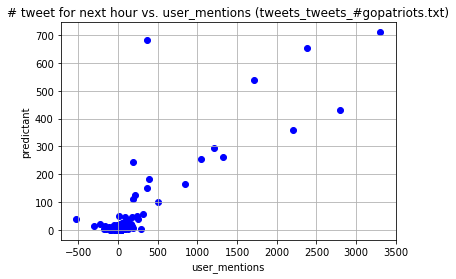

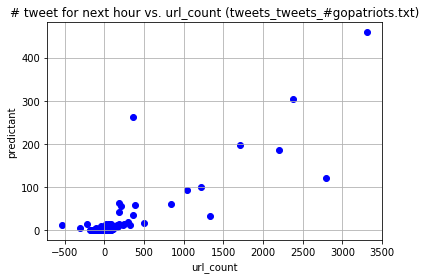

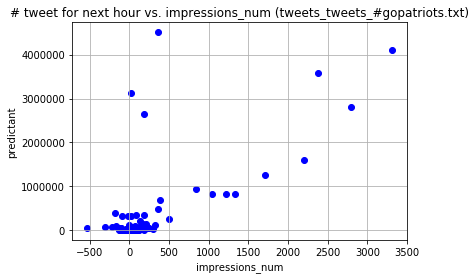

The training error(MSE) is 8711.321575525883
The training error(MAE) is 33.67079921067044
The training error(RMSE) is 93.33446081445953
--------------------
(587, 7)
[5.50000000e+01 6.20000000e+01 9.62560000e+04 1.06580000e+04
 0.00000000e+00 9.62560000e+04 0.00000000e+00 1.00000000e+00
 5.70000000e+01 3.10000000e+01 1.00856000e+05 4.22432797e+00]
For hashtag #nfl:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     176.7
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          9.58e-184
Time:                        17:07:52   Log-Likelihood:                -4356.2
No. Observations:                 586   AIC:                             8736.
Df Residuals:                     574   BIC:                             8789.


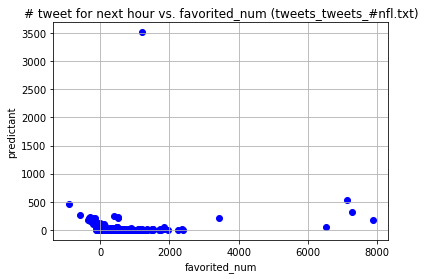

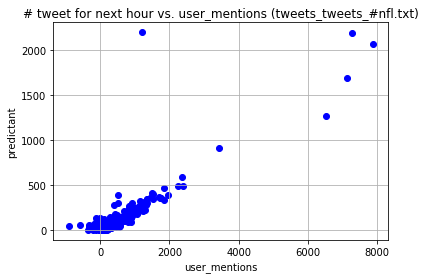

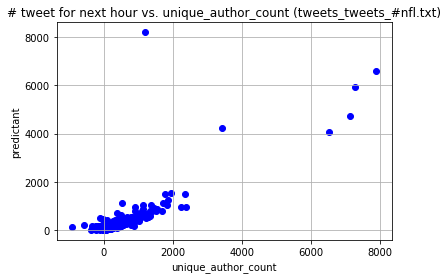

The training error(MSE) is 167640.88819042602
The training error(MAE) is 165.43857303477765
The training error(RMSE) is 409.4397247342105
--------------------
(587, 7)
[2.20000000e+01 2.05000000e+02 1.25757000e+05 4.18180000e+04
 0.00000000e+00 3.76745000e+05 0.00000000e+00 9.00000000e+00
 1.70000000e+01 1.90000000e+01 1.21784000e+05 4.20585213e+00]
For hashtag #patriots:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          6.01e-184
Time:                        17:10:17   Log-Likelihood:                -5239.2
No. Observations:                 586   AIC:                         1.050e+04
Df Residuals:                     574   BIC:                         1.0

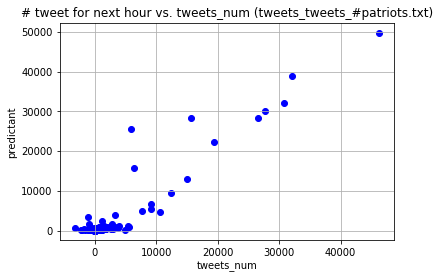

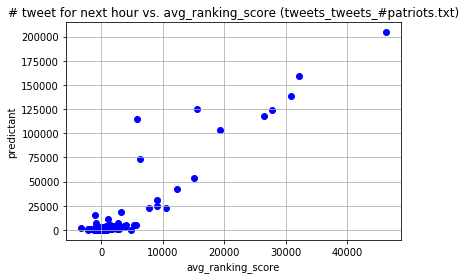

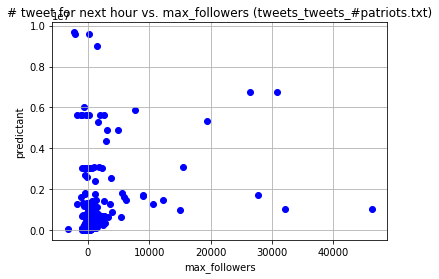

The training error(MSE) is 3413740.8760317257
The training error(MAE) is 557.0481890394791
The training error(RMSE) is 1847.6311525928886
--------------------
(583, 7)
[ 1.         2.        59.        59.         4.        59.
  0.         0.         0.         1.        69.         4.1747985]
For hashtag #sb49:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     419.5
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          1.22e-273
Time:                        17:14:16   Log-Likelihood:                -5467.5
No. Observations:                 582   AIC:                         1.096e+04
Df Residuals:                     570   BIC:                         1.101e+04
Df Model:                          12                

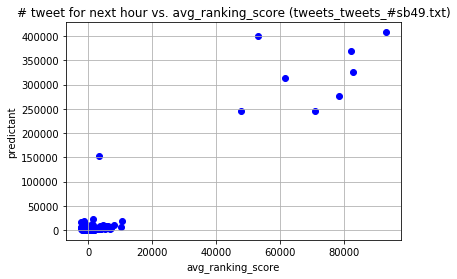

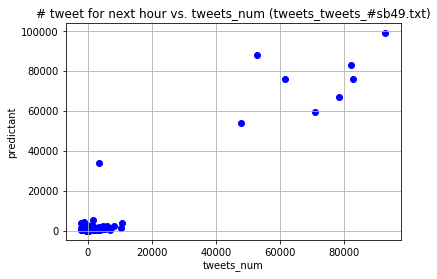

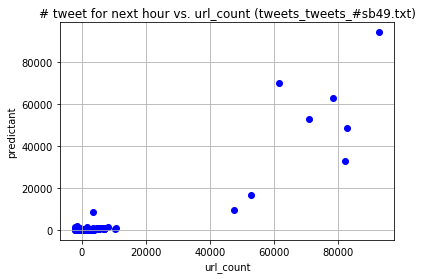

The training error(MSE) is 8459699.638001071
The training error(MAE) is 737.6120033704602
The training error(RMSE) is 2908.5562807002843
--------------------
(586, 7)
[   8.            9.         3181.         1495.            0.
 3181.            0.           10.            6.            7.
 3177.            4.14364664]
For hashtag #superbowl:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     998.9
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:20:40   Log-Likelihood:                -5597.9
No. Observations:                 585   AIC:                         1.122e+04
Df Residuals:                     573   BIC:                         1.127e+04
Df Model:            

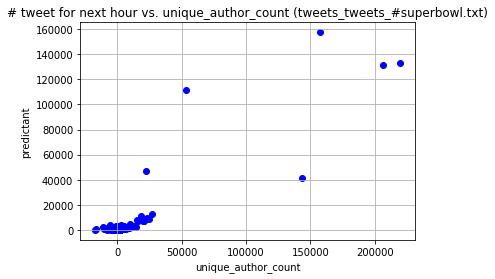

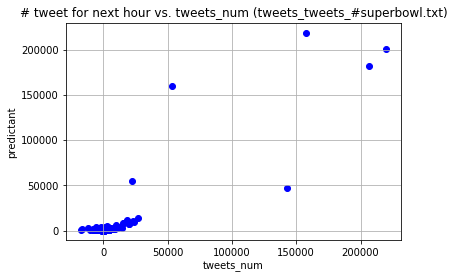

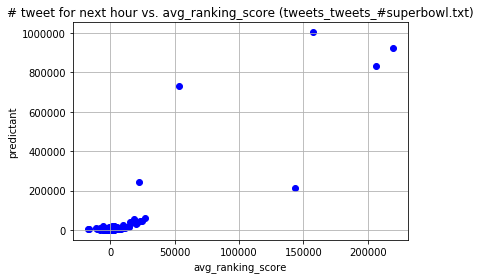

The training error(MSE) is 11997063.378984999
The training error(MAE) is 1507.7126390850635
The training error(RMSE) is 3463.677724469325
--------------------


In [10]:
hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
for hashtag in hashtags:
    all = extract_features(hashtag)
    print ('For hashtag '+hashtag[7:-4]+':')
    #feature_analysis(all)
    features = np.array(['tweets_num', 'retweets_num', 'sum_followers', 'max_followers','time_of_day', 'orig_author_followers', 
              'favorited_num', 'user_mentions', 'url_count', 'unique_author_count','impressions_num','avg_ranking_score'])
    rmse,mae,mse = fitting(all,hashtag,features,True)    
    print ('The training error(MSE) is '+str(mse))
    print ('The training error(MAE) is '+str(mae))
    print ('The training error(RMSE) is '+str(rmse))
    print ('-'*20)
    